In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import copy
import math

In [2]:
# Usamos pandas para abrir nuestro dataset
df = pd.read_csv('AmesHousing.csv')

# Seleccionar solo las columnas numéricas para facilitar los calculos
numeric_df = df.select_dtypes(include=[np.number])


# Veamos un par de las primeras filas
print(numeric_df.head())


   Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           20          93.0     11160             7   
4      5  527105010           60          74.0     13830             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  Wood Deck SF  \
0             5        1960            1960         112.0  ...           210   
1             6        1961            1961           0.0  ...           140   
2             6        1958            1958         108.0  ...           393   
3             5        1968            1968           0.0  ...             0   
4             5        1997            1998           0.0  ...           212   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0

Vamos a verificar si hay datos que pudieran faltar o ser incorrectos en nuestro dataset

In [3]:
# Veamos si hay valores nulos
print("Datos faltantes por columna:")
print(numeric_df.isnull().sum())
# Veamos si hay valores infinitos
print("\nDatos finitos por columna:")
print(np.isfinite(numeric_df).sum())

# Eliminar filas con datos faltantes
numeric_df = numeric_df.dropna()

Datos faltantes por columna:
Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

Datos finitos por columna:
Order              2930
PID      

In [4]:
# Verificar nuevamente después de eliminar filas con datos faltantes
print("\nDatos faltantes después de eliminar filas con NaN:")
print(numeric_df.isnull().sum())

print("\nDatos finitos después de eliminar filas con NaN:")
print(np.isfinite(numeric_df).sum())


Datos faltantes después de eliminar filas con NaN:
Order              0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

Datos finitos después de eliminar filas con NaN:
Order              2274
PID                2274
MS SubClass       

Ahora ya tenemos mejor ordenados los datos quitando los valores nulos y los valores infinitos

Vemos que son muchos datos (caracteristicas) siendo estas 82 asi que la reduciremos caluclando la correlacion de cada caracteristica con el SalePrice es decir el precio de la casa (objetivo)

In [5]:
correlation_matrix = numeric_df.corr() # Usamos corr de pandas para calcular la correlación
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Mostrar las 10 características más correlacionadas con SalePrice
print(correlation_with_saleprice.head(21))

SalePrice         1.000000
Overall Qual      0.803944
Gr Liv Area       0.714171
Garage Cars       0.661288
Garage Area       0.647847
Total Bsmt SF     0.645715
1st Flr SF        0.638762
Full Bath         0.559935
Year Built        0.559622
Garage Yr Blt     0.541860
Year Remod/Add    0.538240
Mas Vnr Area      0.527794
TotRms AbvGrd     0.523273
Fireplaces        0.461333
BsmtFin SF 1      0.435783
Lot Frontage      0.351406
Wood Deck SF      0.330650
Open Porch SF     0.330339
Lot Area          0.309177
Bsmt Full Bath    0.282927
Half Bath         0.269068
Name: SalePrice, dtype: float64


Muy bien ahora tenermos los datos mas importantes para el SalePrice estos son:

- Overall Qual (Calidad Global de la Construcción) teniendo una correlacion de 0.799262 la cual es muy alta
- Gr Liv Area (Área Habitable en Planta) 0.706780 de correlación igual muy alta
- Garage Cars (Número de Coches que Caben en el Garaje) 0.647877 de correlación
- Garage Area (Área del Garaje) 0.640401 de correlación
- Total Bsmt SF (Área Total del Sótano) 0.632280 de correlación
- 1st Flr SF (Área del Primer Piso) 0.621676 de correlación
- Year Built (Año de Construcción) 0.558426 de correlación
- Full Bath (Número de Baños Completos) 0.545604 de correlación

Entre otras caracteristicas con un total de 20

Teniendo estos datos ya sabemos que caracteristicas utilizar asi evitando usar las 82 caracteristicas donde algunas no tendrian mucho impacto

In [6]:
# Trasformar la característica 'Year Built' en 'House Age' para que sea más fácil de interpretar
dataset_year = 2020 # Suponiendo que el dataset se recopila en 2020
numeric_df['House Age'] = dataset_year - numeric_df['Year Built'] # Año actual - Año de construcción

# Asignaremos las caracteristicas a X_train y la variable objetivo SalePrice a y_train
X_train = numeric_df[['Overall Qual', 'Gr Liv Area', 'House Age', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF','Full Bath','Garage Yr Blt','Year Remod/Add','Mas Vnr Area','TotRms AbvGrd','Fireplaces','BsmtFin SF 1','Lot Frontage','Wood Deck SF','Open Porch SF', 'Lot Area','Bsmt Full Bath','Half Bath']]
y_train = numeric_df['SalePrice']

# Transformar SalePrice a miles para facilitar la interpretación
y_train = y_train / 1000

print(X_train.head())
print(y_train.head())

# Convertir a NumPy arrays para facilitar el manejo
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()


   Overall Qual  Gr Liv Area  House Age  Garage Area  Garage Cars  \
0             6         1656         60        528.0          2.0   
1             5          896         59        730.0          1.0   
2             6         1329         62        312.0          1.0   
3             7         2110         52        522.0          2.0   
4             5         1629         23        482.0          2.0   

   Total Bsmt SF  1st Flr SF  Full Bath  Garage Yr Blt  Year Remod/Add  \
0         1080.0        1656          1         1960.0            1960   
1          882.0         896          1         1961.0            1961   
2         1329.0        1329          1         1958.0            1958   
3         2110.0        2110          2         1968.0            1968   
4          928.0         928          2         1997.0            1998   

   Mas Vnr Area  TotRms AbvGrd  Fireplaces  BsmtFin SF 1  Lot Frontage  \
0         112.0              7           2         639.0         1

In [7]:
# Veamos la dimension de nuestros datos

print ('La forma de X_train es:', X_train.shape)
print ('La forma de y_train es:', y_train.shape)
print ('Número de ejemplos de entrenamiento (m):', len(X_train))

La forma de X_train es: (2274, 20)
La forma de y_train es: (2274,)
Número de ejemplos de entrenamiento (m): 2274


[6. 5. 6. ... 6. 5. 7.]
[1656.  896. 1329. ... 1003. 1389. 2000.]
[60. 59. 62. ... 36. 46. 27.]


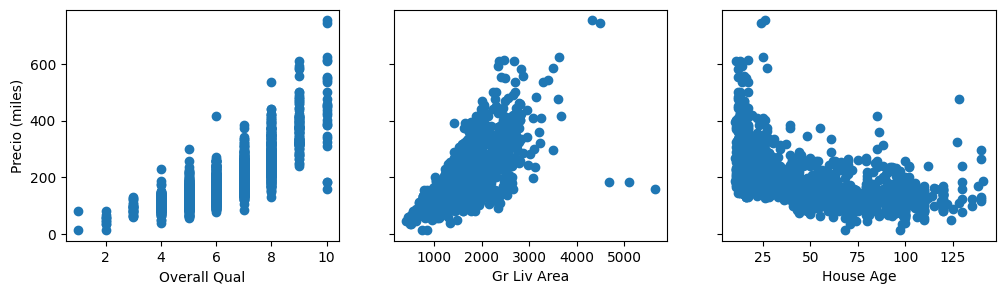

In [8]:

# Vamos a ver estos 3 features donde veremos estos 3 graficos
# Gráfico de dispersión para 'Overall Qual' vs 'SalePrice'
# Gráfico de dispersión para 'Gr Liv Area' vs 'SalePrice'
# Gráfico de dispersión para 'House Age' vs 'SalePrice'

X_features_grafic = ['Overall Qual', 'Gr Liv Area', 'House Age']

# Visualicemos los datos con matplotlib
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    print (X_train[:,i])
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features_grafic[i])
ax[0].set_ylabel("Precio (miles)")
plt.show()

Veamos un poco que nos dicen estos graficos:

Gráfico 1: Overall Qual vs SalePrice: Este gráfico muestra la relación entre la calidad general de las viviendas (Overall Qual) y el precio de venta (SalePrice).
- Podemos ver que claramente miestras mejor calidad mas alto es el valor de la casa siendo entre 8-10 donde los valores de las casas llegan mucho mas alto

Gráfico 2: Gr Liv Area vs SalePrice: Este gráfico muestra la relación entre el área habitable en pies cuadrados (Gr Liv Area) y el precio de venta (SalePrice).
- La mayoria de datos sigue un cierto patron donde mientras mas grande es el area mayor es el precio de la vivienda, podemos ver que la mayoria de casas tienen 1,000 y 2,500 pies cuadrados, con precios de venta que varían entre 100,000 y 400,000.

Gráfico 3: House Age vs SalePrice: Este gráfico muestra la relación entre la edad de las viviendas (House Age) y el precio de venta (SalePrice).
- Observamos que las casas más nuevas (menos de 25 años) tienden a tener precios más altos. 
- Las casas más antiguas muestran una mayor variabilidad en el precio, lo que sugiere que otras caracteristicas también afectan el precio.


# Normalización de z-score
Podemos normalizar los datos para que tengan una media de 0 y una desviación estándar de 1, asi los datos se encuentran en la misma escala evitando que una característica tenga más peso que otra.
Para implementar la normalización de z-score, ajuste sus valores de entrada como se muestra en esta fórmula:

$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
donde $j$ selecciona una característica o columna en la matriz $\mathbf{X}$. $µ_j$ es la media de todos los valores para la característica (j) y $\sigma_j$ es la desviación estándar de la característica (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** Cuando se normalizan las características, es crucial guardar los valores utilizados para la normalización: la media y la desviación estándar empleadas en los cálculos. Después de entrenar el modelo, es común querer predecir los precios de casas no vistas previamente. Para hacerlo con un nuevo valor x primero debemos normalizar x utilizando los valores de media y desviación estándar calculados previamente a partir del conjunto de entrenamiento.


In [9]:
def zscore_normalize_features(X):
    """
    Calcula X normalizado por z-score por columna.
    
    Args:
      X (ndarray (m,n))     : datos de entrada, m ejemplos, n características
      
    Returns:
      X_norm (ndarray (m,n)): entrada normalizada por columna
      mu (ndarray (n,))     : media de cada característica
      sigma (ndarray (n,))  : desviación estándar de cada característica
    """
    # encuentra la media de cada columna/característica
    mu = np.mean(X, axis=0)                 # mu tendrá forma (n,)
    # encuentra la desviación estándar de cada columna/característica
    sigma = np.std(X, axis=0)               # sigma tendrá forma (n,)
    # resta la media de esa columna a cada ejemplo y divide por la desviación estándar de esa columna
    X_norm = (X - mu) / sigma      

    return X_norm, mu, sigma

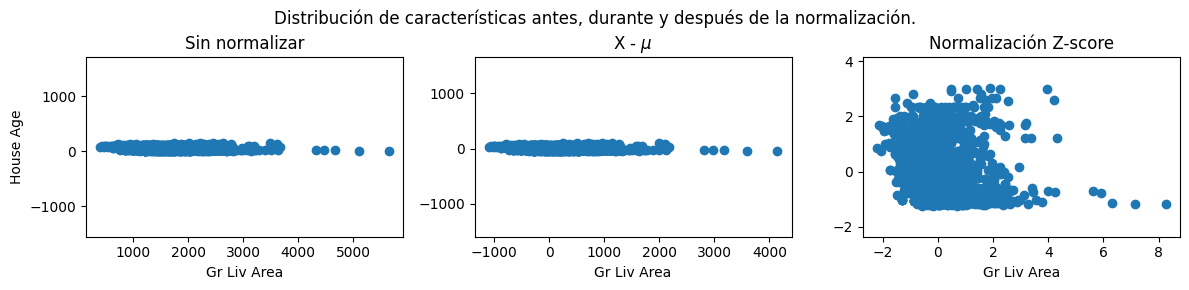

In [10]:
X_features = ['Overall Qual', 'Gr Liv Area', 'House Age', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF','Full Bath','Garage Yr Blt','Year Remod/Add','Mas Vnr Area','TotRms AbvGrd','Fireplaces','BsmtFin SF 1','Lot Frontage','Wood Deck SF','Open Porch SF', 'Lot Area','Bsmt Full Bath','Half Bath']

mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,1], X_train[:,2])
ax[0].set_xlabel(X_features[1]); ax[0].set_ylabel(X_features[2]);
ax[0].set_title("Sin normalizar")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,1], X_mean[:,2])
ax[1].set_xlabel(X_features[1]); ax[0].set_ylabel(X_features[2]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,1], X_norm[:,2])
ax[2].set_xlabel(X_features[1]); ax[0].set_ylabel(X_features[2]);
ax[2].set_title(r"Normalización Z-score")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribución de características antes, durante y después de la normalización.")
plt.show()

La gráfica anterior muestra la relación entre dos de los parámetros del conjunto de entrenamiento, "House Age" y "Gr Liv Area". Estos están representados con la misma escala.

- Izquierda: Sin normalizar: El rango de valores o la varianza de la característica 'Gr Liv Area' es mucho mayor que la de 'House Age'.
- Centro: El primer paso elimina la media o el valor promedio de cada característica. Esto deja las características centradas alrededor de cero. Es difícil ver la diferencia para la característica 'House Age', pero 'Gr Liv Area' está claramente mas cercano a cero.
- Derecha: El segundo paso divide por la desviación estándar. Esto deja ambas características centradas en cero con una escala similar.

Ahora normalicemos nuestros datos y compárelos con los datos originales.

In [11]:
# normalizar las características originales
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Rango máximo a mínimo por columna en X sin normalizar: {np.ptp(X_train, axis=0)}")
print(f"Rango máximo a mínimo por columna en X normalizado: {np.ptp(X_norm, axis=0)}")

X_mu = [6.18073879e+00 1.50334169e+03 4.80004398e+01 4.98566403e+02
 1.85795954e+00 1.06631530e+03 1.16473791e+03 1.56684257e+00
 1.97769041e+03 1.98488918e+03 1.05298153e+02 6.45646438e+00
 5.94107300e-01 4.40060686e+02 6.97453826e+01 9.26235708e+01
 4.71605101e+01 9.82019437e+03 4.25241865e-01 3.72031662e-01], 
X_sigma = [1.42207690e+00 5.01743764e+02 3.07672412e+01 1.93801581e+02
 6.68791994e-01 4.47608589e+02 3.95300433e+02 5.45365027e-01
 2.61657498e+01 2.11517538e+01 1.83940408e+02 1.54615163e+00
 6.38256006e-01 4.65935602e+02 2.33610111e+01 1.22359473e+02
 6.59215787e+01 6.52557995e+03 5.16989763e-01 4.95920567e-01]
Rango máximo a mínimo por columna en X sin normalizar: [9.00000e+00 5.23500e+03 1.31000e+02 1.38800e+03 4.00000e+00 6.11000e+03
 4.68800e+03 4.00000e+00 1.15000e+02 6.00000e+01 1.60000e+03 1.20000e+01
 4.00000e+00 5.64400e+03 2.92000e+02 8.70000e+02 5.70000e+02 2.13945e+05
 2.00000e+00 2.00000e+00]
Rango máximo a mínimo por columna en X normalizado: [ 6.32877167 10.4

In [12]:
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data)) * 0.2
    x = np.linspace(np.min(data) - scale, np.max(data) + scale, 50)
    _, bins, _ = ax.hist(data, x, color="xkcd:azure")
    
    mu = np.mean(data)
    std = np.std(data)
    dist = norm.pdf(bins, loc=mu, scale=std)
    
    axr = ax.twinx()
    axr.plot(bins, dist, color="orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

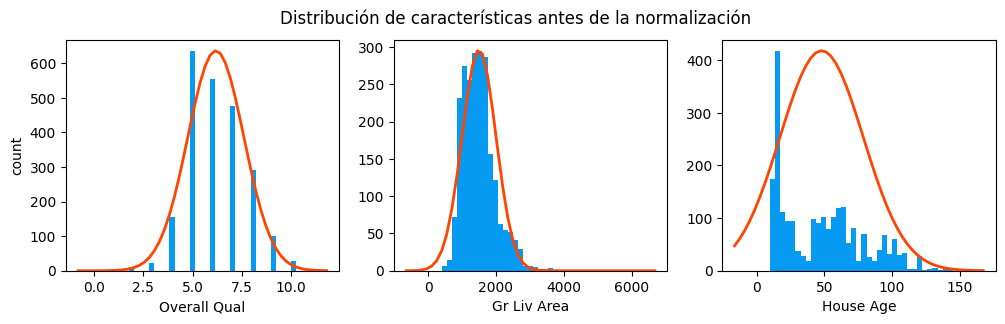

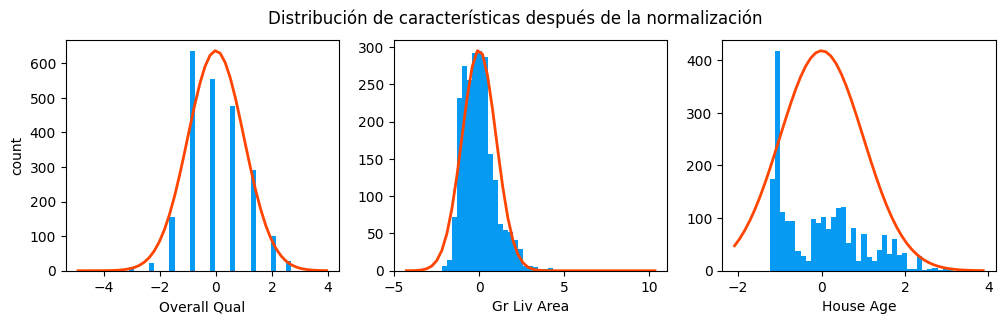

In [13]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("Distribución de características antes de la normalización")
plt.show()

fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("Distribución de características después de la normalización")

plt.show()

Vemos que la normalización ha sido exitosa donde el rango máximo a mínimo de cada columna se reduce de un factor de miles a un factor de 2-3 mediante la normalización.

<a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables

Ahora se implementara la ecuación de la función de costos con múltiples variables $J(\mathbf{w},b)$ la cual es:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
donde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


$\mathbf{w}$ y $\mathbf{x}^{(i)}$ son vectores en lugar de escalares que admiten múltiples características.

In [14]:
def compute_cost(X, y, w, b): 
    """
    Calcula el costo
    Args:
      X (ndarray (m,n)): Datos, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros del modelo  
      b (escalar)       : parámetro del modelo
      
    Returns:
      cost (escalar): costo
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = escalar (ver np.dot)
        cost = cost + (f_wb_i - y[i])**2       #escalar
    cost = cost / (2 * m)                      #escalar
    return cost

<a name="toc_15456_5"></a>
# Gradient Descent With Multiple Variables
Descenso de gradiente para múltiples variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, n es el número de características, los parámetros $w_j$, $b$, se actualizan simultáneamente y donde

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo, mientras que $y^{(i)}$ es el valor objetivo


# Compute Gradient with Multiple Variables
A continuación se muestra una implementación para calcular las ecuaciones (6) y (7). Hay muchas maneras de implementar esto. En esta versión hay una
 - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ para el ejemplo se puede calcular directamente y acumular
 - en un segundo bucle sobre las n características:
    - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ se calcula para cada $w_j$.

In [15]:
def compute_gradient(X, y, w, b): 
    """
    Calcula el gradiente para la regresión lineal 
    Args:
      X (ndarray (m,n)): Datos, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros del modelo  
      b (escalar)       : parámetro del modelo
      
    Returns:
      dj_dw (ndarray (n,)): El gradiente del costo con respecto a los parámetros w.
      dj_db (escalar):       El gradiente del costo con respecto al parámetro b.
    """
    m,n = X.shape           #(número de ejemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

<a name="toc_15456_5.2"></a>
## Gradient Descent With Multiple Variables
La siguiente celda implementa la ecuación (5) anterior.

In [16]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Realiza descenso de gradiente por lotes para aprender w y b. Actualiza w y b tomando
    num_iters pasos de gradiente con tasa de aprendizaje alpha
    
    Args:
      X (ndarray (m,n))   : Datos, m ejemplos con n características
      y (ndarray (m,))    : valores objetivo
      w_in (ndarray (n,)) : parámetros iniciales del modelo  
      b_in (escalar)      : parámetro inicial del modelo
      cost_function       : función para calcular el costo
      gradient_function   : función para calcular el gradiente
      alpha (flotante)    : Tasa de aprendizaje
      num_iters (entero)  : número de iteraciones para ejecutar el descenso de gradiente
      
    Returns:
      w (ndarray (n,)) : Valores actualizados de los parámetros w
      b (escalar)      : Valor actualizado del parámetro b 
      J_history (lista): Lista de costos en cada iteración 
      """
    
     # Un arreglo para almacenar el costo J en cada iteración
    J_history = []
    w = copy.deepcopy(w_in)  #Evitar modificar w global dentro de la función
    b = b_in
    
    for i in range(num_iters):

        # Calcular el gradiente y actualizar los parámetros
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Actualizar parámetros usando w, b, alpha y el gradiente
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Guardar costo J en cada iteración
        if i<100000:      # prevenir agotamiento de recursos
            J_history.append( cost_function(X, y, w, b))

        # Imprime el costo cada 10 intervalos de tiempo o tantas iteraciones si son < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteración {i:4d}: Costo {J_history[-1]:.2e}   ")
        
    return w, b, J_history #retorna w, b finales y J_history para graficar

In [17]:
# Entrenemos el modelo


# Aqui se puede usar X_train la cual no esta normalizada y el modelo da resultados peor que con X_norm la cual esta normalizada
# initial_w = np.zeros(X_train.shape[1])
# initial_b = 0
# # Se debe ajustar el valor de alpha para que el modelo converja ya que si es muy grande, el modelo diverge
# # Con 5.0e-7 nuestro modelo no converge es necesario ajustar el valor de alpha a un valor más pequeño como 1.0e-10
# alpha = 1.0e-10
# iterations = 1000
# # Entrenar el modelo
# w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
#                                                     compute_cost, compute_gradient, 
#                                                     alpha, iterations)

# print(f"b,w encontrado por descenso de gradiente: {b_final:0.2f},{w_final} ")


# Ahora usaremos X_norm en lugar de X_train

initial_w = np.zeros(X_norm.shape[1])
initial_b = 0
# Se debe ajustar el valor de alpha para que el modelo converja ya que si es muy grande, el modelo diverge y si es muy pequeño el modelo no converge
# Con 5.0e-7 nuestro modelo no converge es necesario ajustar el valor de alpha a un valor más grande como 1.0e-1 
alpha = 1.0e-1
iterations = 1000
# Entrenar el modelo
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

print(f"b,w encontrado por descenso de gradiente: {b_final:0.2f},{w_final} ")


Iteración    0: Costo 1.48e+04   
Iteración  100: Costo 6.36e+02   
Iteración  200: Costo 6.35e+02   
Iteración  300: Costo 6.34e+02   
Iteración  400: Costo 6.34e+02   
Iteración  500: Costo 6.34e+02   
Iteración  600: Costo 6.34e+02   
Iteración  700: Costo 6.34e+02   
Iteración  800: Costo 6.34e+02   
Iteración  900: Costo 6.34e+02   
b,w encontrado por descenso de gradiente: 184.39,[29.39342141 21.37780455 -5.07578095  5.34087418  5.85970873  5.27748233
  1.07801536 -0.74648869 -0.82134367  7.60185363  6.75291136 -0.14261406
  4.34796313  6.6277396   1.17998208  2.16005937 -1.03840209  4.74798361
  3.61789898  0.13010886] 


In [18]:
# # Ahora vamos a predecir los valores de y_train y compararlos con los valores reales
# m,_ = X_train.shape
# for i in range(m):
#     print(f"predicción: {np.dot(X_train[i], w_final) + b_final:0.2f}, valor real: {y_train[i]}")

# Usar X_norm en lugar de X_train
m,_ = X_norm.shape
for i in range(m):
    print(f"predicción: {np.dot(X_norm[i], w_final) + b_final:0.2f}, valor real: {y_train[i]}")

predicción: 219.05, valor real: 215.0
predicción: 113.91, valor real: 105.0
predicción: 162.96, valor real: 172.0
predicción: 256.83, valor real: 244.0
predicción: 178.05, valor real: 189.9
predicción: 195.37, valor real: 195.5
predicción: 224.06, valor real: 213.5
predicción: 201.16, valor real: 191.5
predicción: 254.77, valor real: 236.5
predicción: 209.09, valor real: 189.0
predicción: 178.47, valor real: 175.9
predicción: 167.16, valor real: 180.4
predicción: 213.83, valor real: 171.5
predicción: 410.92, valor real: 538.0
predicción: 235.57, valor real: 164.0
predicción: 336.44, valor real: 394.432
predicción: 87.49, valor real: 141.0
predicción: 243.21, valor real: 210.0
predicción: 223.69, valor real: 190.0
predicción: 202.66, valor real: 170.0
predicción: 126.14, valor real: 142.0
predicción: 110.94, valor real: 126.0
predicción: 216.72, valor real: 184.0
predicción: 131.21, valor real: 96.0
predicción: 113.01, valor real: 105.5
predicción: 124.61, valor real: 88.0
predicción: 1

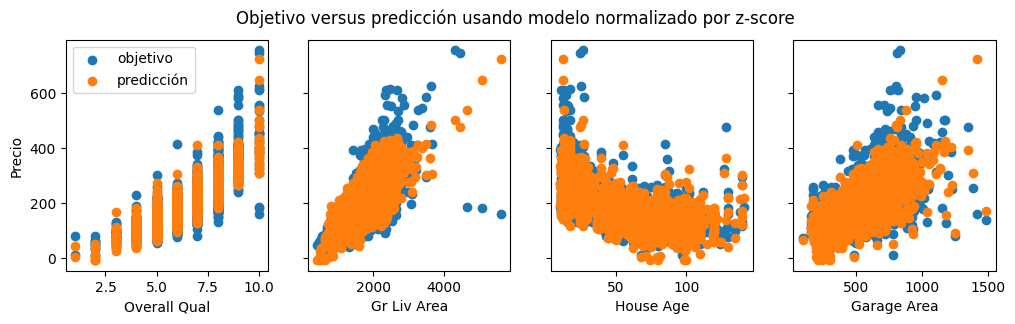

In [19]:
# Grafico con X_train sin normalizar
# m = X_train.shape[0]
# yp = np.zeros(m)
# for i in range(m):
#     yp[i] = np.dot(X_train[i], w_final) + b_final

# Calcular las predicciones para cada ejemplo
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final) + b_final
    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'objetivo')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp, label = 'predicción')
ax[0].set_ylabel("Precio"); ax[0].legend()
fig.suptitle("Objetivo versus predicción usando modelo normalizado por z-score")
plt.show()

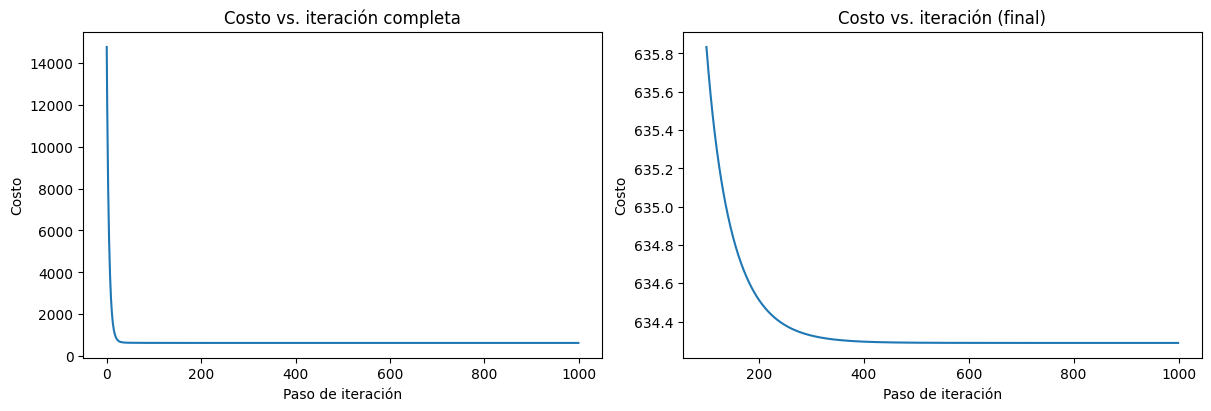

In [20]:
# Graficar costo versus iteración
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Gráfico 1: Costo completo
ax1.plot(J_hist)
ax1.set_title("Costo vs. iteración completa")
ax1.set_ylabel('Costo')
ax1.set_xlabel('Paso de iteración')

# Gráfico 2: Costo en la parte final de las iteraciones
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax2.set_title("Costo vs. iteración (final)")
ax2.set_ylabel('Costo')
ax2.set_xlabel('Paso de iteración')

plt.show()


Vemos que el costo disminuye con el número de iteraciones, lo que indica que el modelo está aprendiendo y mejorando
